In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

#Per linear classification
from sklearn.linear_model import Perceptron
from sklearn import svm

print('Libraries imported.')

Libraries imported.


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/ColabNotebooks/MachineLearning/HomeWork1_Dataset.tsv'
df = pd.read_csv(filename, sep='\t', header=0)
print('File loaded: %d samples.' %(len(df)))
print("Number of columns: ", len(df.columns))

File loaded: 1000 samples.
Number of columns:  37


In [4]:
X_all = df.iloc[:,:35]
classification_y_all = df['num_collisions']
regression_y_all = df['min_CPA']


#apply normalization
X_normalized = X_all.copy()
for column in X_normalized.columns:
  X_normalized[column] = (X_normalized[column] - X_normalized[column].min()) / (X_normalized[column].max() - X_normalized[column].min())    


reg_y_all_normalized = regression_y_all.copy()
reg_y_all_normalized = (reg_y_all_normalized - reg_y_all_normalized.min()) / (reg_y_all_normalized.max() - reg_y_all_normalized.min())    

In [5]:
#Divisione del dataset trainig e test
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_normalized,reg_y_all_normalized,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (660, 35)
Dataset y train : (660,)
Dataset x test : (340, 35)
Dataset y test : (340,)


In [6]:
model_type = "poly_svm"  # "linear_regression", "linear_svm", "poly_svm"

if model_type == "linear_regression":
  # Create linear regression object
  model = linear_model.LinearRegression()
  # Train the model using the training sets
  model.fit(x_train, y_train)

elif model_type == "linear_svm":
  # SVM regression
  model = SVR(kernel='linear', C=1.5)
  # Train the model using the training sets
  model.fit(x_train, y_train)

elif model_type == "poly_svm":
  # SVM polynomial regression
  model = SVR(kernel='poly', C=1.5, degree=3, gamma='scale')
  # Train the model using the training sets
  model.fit(x_train, y_train)


In [7]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# R2 regression score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.05
Regression score: -0.12


In [8]:
print(x_test.shape)
print(y_test.shape)

(340, 35)
(340,)


In [21]:
#Plot Output
from sklearn.manifold import MDS
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(x_train)



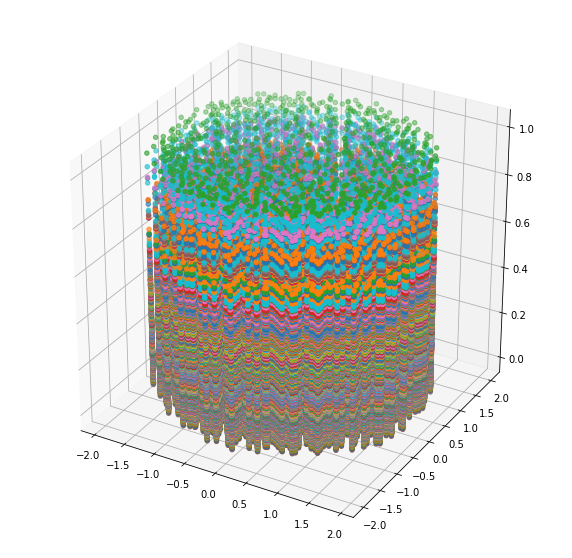

In [17]:
ax = plt.axes(projection='3d')
for i in y_train:
  x = [row[0] for row in X_2d]
  y = [row[1] for row in X_2d]  
  ax.scatter3D(x,y,i,label="Cpa "+str(i))
plt.show()

In [24]:
mds = MDS(1,random_state=0)
X_1d = mds.fit_transform(x_train)

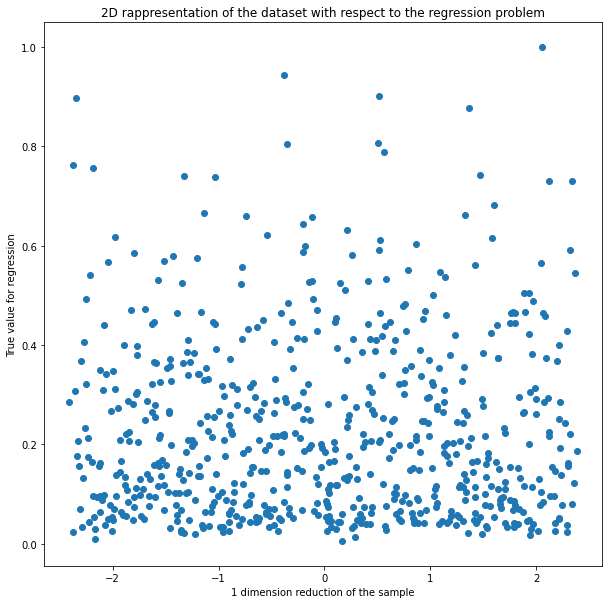

In [18]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_1d,y_train,label="Cpa "+str(i))
plt.title("2D rappresentation of the dataset with respect to the regression problem")
plt.xlabel("1 dimension reduction of the sample")
plt.ylabel("True value for regression")
plt.show()

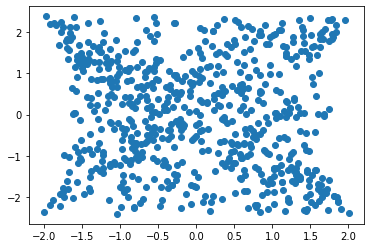

In [101]:
plt.scatter(y,X_1d,label="Cpa "+str(i))


#KNN FOR REGRESSION 

Dataset non bilanciato

In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline



In [22]:
mds = MDS(1,random_state=0)
X_test_1d = mds.fit_transform(x_test)

In [37]:
rmse_val = [] #to store rmse values for different k
mean_absolute_error_val = []
r2_val = []

best_r2 = -10000000
best_k_r2 = 0

bestMSE = 10000
best_k_MSE = 0
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    r2 = r2_score(y_test,pred);
    mae = mean_absolute_error(y_test,pred)
    rmse_val.append(error) #store rmse values
    mean_absolute_error_val.append(mae) #store mae
    r2_val.append(r2)

    if r2>best_r2:
      best_r2 = r2
      best_k_r2 = K
    
    if error<bestMSE:
      bestMSE = error
      best_k_MSE = K


    print('K= ' , K ,'R2->',r2, 'MSE->', error,' MAE->',mae)


print("Best MSE-> ",bestMSE," for K = ",best_k_MSE)
print("Best R2-> ",best_r2," for K =",best_k_r2)

K=  1 R2-> -0.40468725293576746 MSE-> 0.062070237838570755  MAE-> 0.1841760127863197
K=  2 R2-> -0.17880275025515724 MSE-> 0.05208886669981388  MAE-> 0.16845335407328751
K=  3 R2-> -0.06779488771278608 MSE-> 0.0471836577890362  MAE-> 0.16096341086826493
K=  4 R2-> -0.054808651105468176 MSE-> 0.046609822728484795  MAE-> 0.1604426613229737
K=  5 R2-> -0.02649264082955849 MSE-> 0.04535859652934914  MAE-> 0.15821820740829434
K=  6 R2-> -0.04762153182148876 MSE-> 0.046292238723647836  MAE-> 0.15860801012023407
K=  7 R2-> -0.020671796924268016 MSE-> 0.04510138542070737  MAE-> 0.15753412362513874
K=  8 R2-> -0.03155174571901287 MSE-> 0.045582147959094384  MAE-> 0.15895527941227575
K=  9 R2-> -0.017055337320365238 MSE-> 0.044941581516116734  MAE-> 0.15802726850005586
K=  10 R2-> -0.015522080350472978 MSE-> 0.0448738300471759  MAE-> 0.15710230818642001
K=  11 R2-> -0.01478035277996459 MSE-> 0.044841054632850284  MAE-> 0.15721391185784403
K=  12 R2-> -0.016766251206247418 MSE-> 0.044928807395883

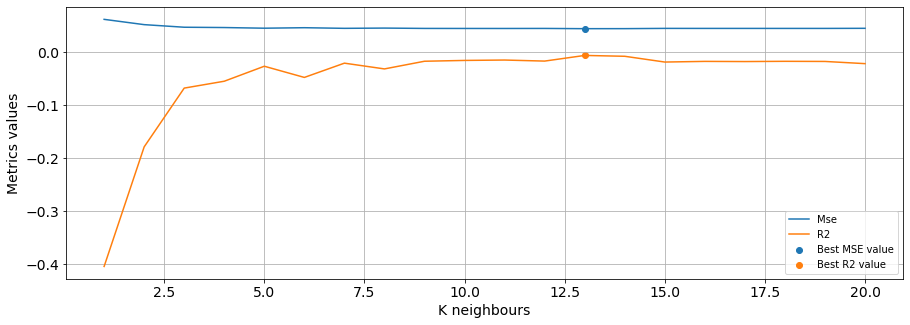

In [47]:
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + K ), rmse_val, label="Mse")
plt.plot(range(1, 1 + K ), r2_val, label="R2")


plt.scatter(best_k_MSE,bestMSE,label="Best MSE value")
plt.scatter(best_k_r2,best_r2,label="Best R2 value")


plt.grid(True)
plt.xlabel("K neighbours", fontsize = 14)
plt.ylabel("Metrics values", fontsize = 14)
#plt.ylim([0,1])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.show()

#KERNEL METHOD FOR REGRESSION


In [12]:
#GRID SEARCH SUL KERNEL
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
      'regressor__kernel' : ['rbf', 'poly', 'sigmoid','linear'],
      'regressor__gamma': [1,0.1,0.001],
      'regressor__C': np.logspace(-4, 4, 5)
     }
    ]

#Grid search Svm regression con kernel
pipe = Pipeline([('regressor' , svm.SVR())])
svm_clf = GridSearchCV(pipe, param_grid = param_grid, scoring="neg_mean_squared_error", cv = 5, verbose=10 , n_jobs=-1)

svm_clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('regressor', SVR())],
 'estimator__verbose': False,
 'estimator__regressor': SVR(),
 'estimator__regressor__C': 1.0,
 'estimator__regressor__cache_size': 200,
 'estimator__regressor__coef0': 0.0,
 'estimator__regressor__degree': 3,
 'estimator__regressor__epsilon': 0.1,
 'estimator__regressor__gamma': 'scale',
 'estimator__regressor__kernel': 'rbf',
 'estimator__regressor__max_iter': -1,
 'estimator__regressor__shrinking': True,
 'estimator__regressor__tol': 0.001,
 'estimator__regressor__verbose': False,
 'estimator': Pipeline(steps=[('regressor', SVR())]),
 'n_jobs': -1,
 'param_grid': [{'regressor__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
   'regressor__gamma': [1, 0.1, 0.001],
   'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 10}

In [13]:
#Addestramento
svm_clf.get_params()
svm_clf.fit(x_train, y_train) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', SVR())]), n_jobs=-1,
             param_grid=[{'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__gamma': [1, 0.1, 0.001],
                          'regressor__kernel': ['rbf', 'poly', 'sigmoid',
                                                'linear']}],
             scoring='neg_mean_squared_error', verbose=10)

In [43]:
print(svm_clf.best_params_)
print(svm_clf.best_score_)
print("Best Estimator :",svm_clf.best_estimator_)

{'regressor__C': 1.0, 'regressor__gamma': 1, 'regressor__kernel': 'rbf'}
-0.03224791789919374
Best Estimator : Pipeline(steps=[('regressor', SVR(gamma=1))])
